# Spotify Music Data
This dataset consists of ~600 songs that were in the top songs of the year from 2010 to 2019 (as measured by Billboard). You can explore interesting song data pulled from [Spotify](http://organizeyourmusic.playlistmachinery.com/#) such as the beats per minute, amount of spoken words, loudness, and energy of every song. 

Not sure where to begin? Scroll to the bottom to find challenges!

## Data dictionary

|    | Variable   | Explanation                                                |
|---:|:-----------|:-----------------------------------------------------------|
|  0 | title      | The title of the song                                      |
|  1 | artist     | The artist of the song                                     |
|  2 | top genre  | The genre of the song                                      |
|  3 | year       | The year the song was in the Billboard                     |
|  4 | bpm        | Beats per minute: the tempo of the song                    |
|  5 | nrgy       | The energy of the song: higher values mean more energetic (fast, loud)  |
|  6 | dnce       | The danceability of the song: higher values mean it's easier to dance to  |
|  7 | dB         | Decibel: the loudness of the song  |
|  8 | live       | Liveness: likeliness the song was recorded with a live audience  |
|  9 | val        | Valence: higher values mean a more positive sound (happy, cheerful) |
| 10 | dur        | The duration of the song |
| 11 | acous      | The acousticness of the song: likeliness the song is acoustic|
| 12 | spch       | Speechines: higher values mean more spoken words |
| 13 | pop        | Popularity: higher values mean more popular|

[Source](https://www.kaggle.com/leonardopena/top-spotify-songs-from-20102019-by-year) of dataset.

## Don't know where to start? 

**Challenges are brief tasks designed to help you practice specific skills:**

- 🗺️ **Explore**: Which artists and genres are the most popular?
- 📊 **Visualize**: Visualize the numeric values as a time-series by year. Can you spot any changes over the years?
- 🔎 **Analyze**: Train and build a classifier to predict a song's genre based on columns 3 to 13.

**Scenarios are broader questions to help you develop an end-to-end project for your portfolio:**

Your friend, who is an aspiring musician, wants to make a hit song and has asked you to use your data skills to help her. You have decided to analyze what makes a top song, keeping in mind changes over the years. What concrete recommendations can you give her before she writes lyrics, makes beats, and records the song? She's open to any genre!

You will need to prepare a report that is accessible to a broad audience. It will need to outline your motivation, analysis steps, findings, and conclusions.

---

✍️ _If you have an idea for an interesting Scenario or Challenge, or have feedback on our existing ones, let us know! You can submit feedback by pressing the question mark in the top right corner of the screen and selecting "Give Feedback". Include the phrase "Content Feedback" to help us flag it in our system._

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
df = pd.read_csv("spotify_top_music.csv", index_col=0)

df

,title,artist,top genre,year,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
1,"Hey, Soul Sister",Train,neo mellow,2010,97,89,67,-4,8,80,217,19,4,83
2,Love The Way You Lie,Eminem,detroit hip hop,2010,87,93,75,-5,52,64,263,24,23,82
3,TiK ToK,Kesha,dance pop,2010,120,84,76,-3,29,71,200,10,14,80
4,Bad Romance,Lady Gaga,dance pop,2010,119,92,70,-4,8,71,295,0,4,79
5,Just the Way You Are,Bruno Mars,pop,2010,109,84,64,-5,9,43,221,2,4,78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,2019,104,66,61,-7,20,16,176,1,3,75
600,Cross Me (feat. Chance the Rapper & PnB Rock),Ed Sheeran,pop,2019,95,79,75,-6,7,61,206,21,12,75
601,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,2019,136,76,53,-5,9,65,260,7,34,70
602,Nothing Breaks Like a Heart (feat. Miley Cyrus),Mark Ronson,dance pop,2019,114,79,60,-6,42,24,217,1,7,69


## Top Artists by Number of Hits

In [2]:
df_top_artists = df.groupby("artist")["title"].count().sort_values(ascending=False).reset_index(drop=False)
df_top_artists

,artist,title
0,Katy Perry,17
1,Justin Bieber,16
2,Maroon 5,15
3,Rihanna,15
4,Lady Gaga,14
...,...,...
179,Jonas Blue,1
180,John Newman,1
181,Joey Montana,1
182,Jewel,1


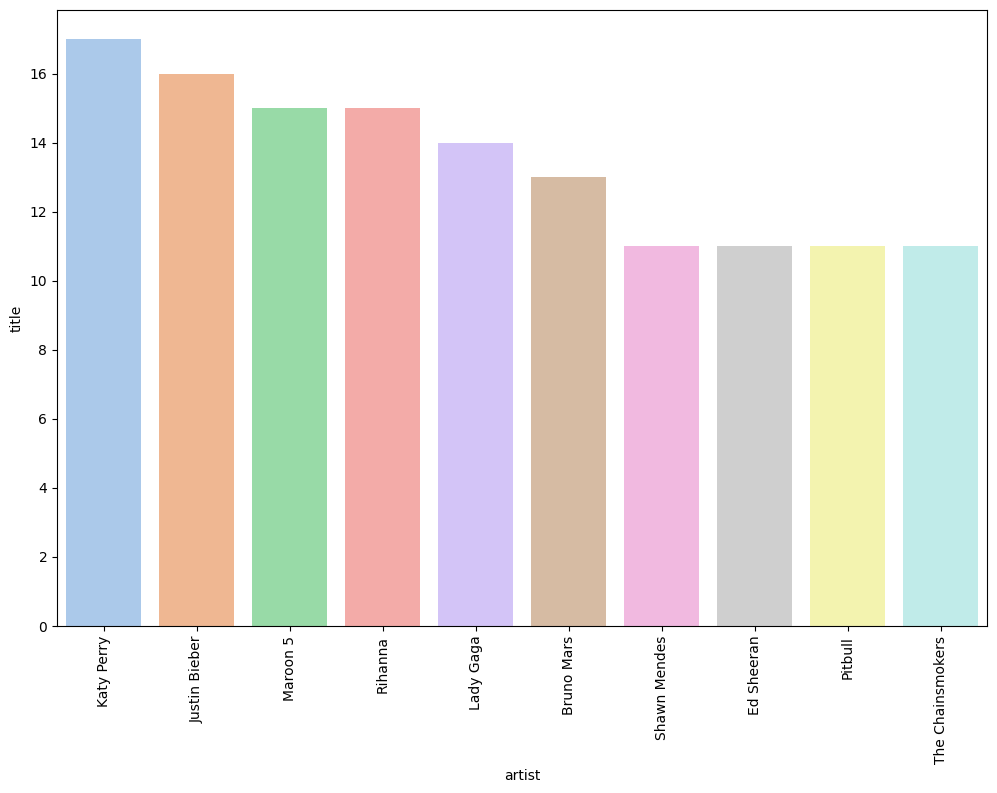

In [3]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_top_artists[:10], x="artist", y="title",palette="pastel")
plt.xticks(rotation=90)
plt.show()

## Most Hits in a Single Year

In [4]:
df_hits_per_year = df.groupby(["year", "artist"])["title"].count().sort_values(ascending=False).reset_index(drop=False)
df_hits_per_year

,year,artist,title
0,2015,Justin Bieber,9
1,2011,Lady Gaga,5
2,2019,Ed Sheeran,5
3,2011,Beyoncé,4
4,2018,Shawn Mendes,4
...,...,...,...
404,2015,Katy Perry,1
405,2015,Jessie J,1
406,2015,Jess Glynne,1
407,2012,Selena Gomez & The Scene,1


## Top Artists by the Sum of Popularity

In [5]:
df_sum_pop = df.groupby("artist")["pop"].sum().sort_values(ascending=False).reset_index(drop=False)
df_sum_pop

,artist,pop
0,Justin Bieber,1150
1,Maroon 5,1123
2,Katy Perry,1056
3,Rihanna,981
4,Lady Gaga,964
...,...,...
179,Joey Montana,29
180,Kelly Rowland,28
181,Nelly Furtado,18
182,Jennifer Hudson,18


## BPM x Popularity

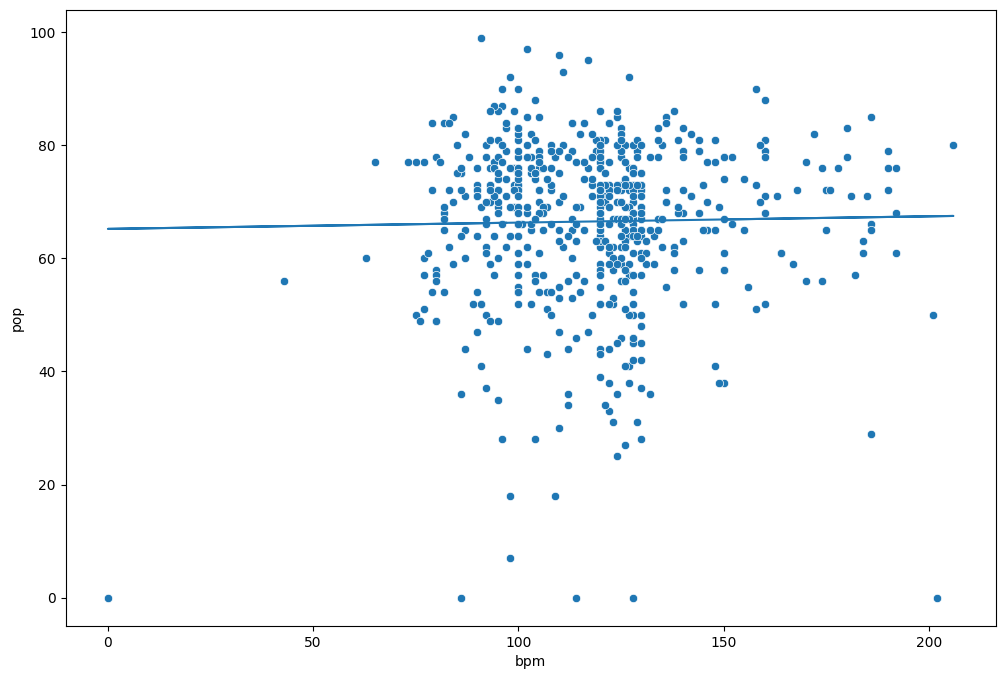

In [6]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="bpm", y="pop")
reg_bpm_pop = LinearRegression()
bpm = np.array(df['bpm'])
bpm = bpm.reshape(-1,1)
pop = np.array(df['pop'])
pop = pop.reshape(-1,1)
reg_bpm_pop.fit(bpm, pop)
line_predicted = reg_bpm_pop.predict(bpm)
plt.plot(bpm, line_predicted)
plt.show()

## Danceability x Popularity

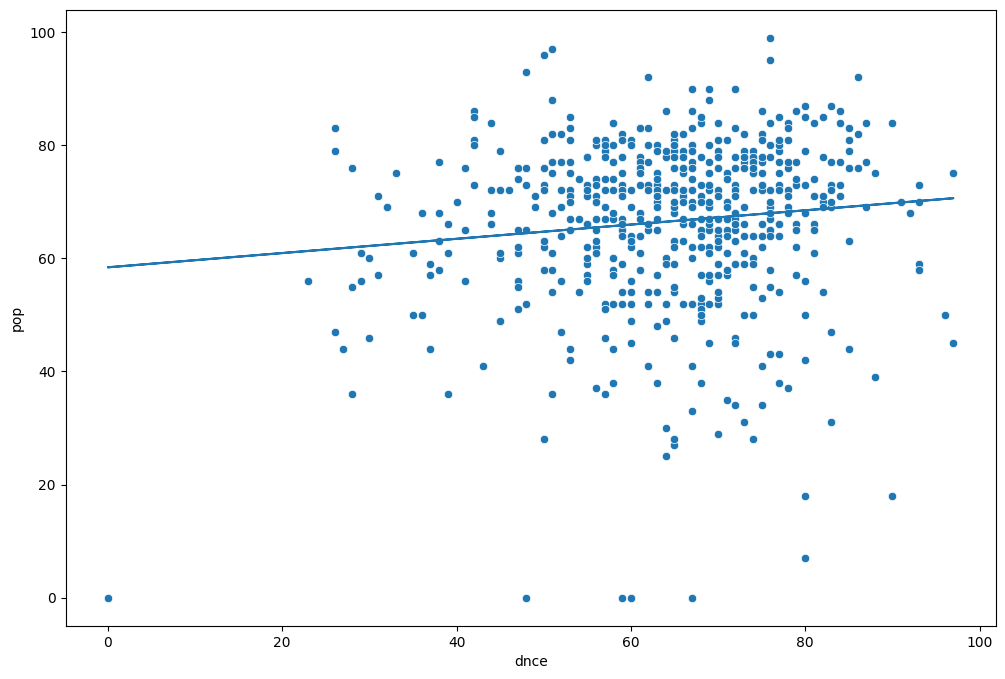

In [7]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x="dnce", y="pop")
reg_dnce_pop = LinearRegression()
dnce = np.array(df['dnce'])
dnce = dnce.reshape(-1,1)
pop = np.array(df['pop'])
pop = pop.reshape(-1,1)
reg_dnce_pop.fit(dnce, pop)
line_predicted_dnce = reg_dnce_pop.predict(dnce)
plt.plot(dnce, line_predicted_dnce)
plt.show()

## Predict